In [261]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cvxopt import matrix, solvers
%matplotlib inline

# load the wines data into a pandas dataframe
fname = r'wines.csv'
wines = pd.read_csv(fname,delimiter=';',header=0)
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [281]:
# dimension of the data
n = wines.shape[0]
m = wines.shape[1]-1
# augment the X and parse Y
min_max_scaler = preprocessing.MinMaxScaler()
X = np.hstack((wines.iloc[:,:-1],np.ones((n,1))))
Y = wines.iloc[:,-1].astype('double')
# c is (m+1+n)
# setting the coefficients in c corresponding to a_j and b to zeros and average the z's
c = matrix(np.hstack([np.zeros(m+1),np.ones(n)/n]))
# A is 2n by (m+1+n)
XX = np.vstack([-X,X])
I = np.vstack([-np.eye(n),-np.eye(n)])
A = np.hstack([XX,I])
# we need to format this for the solver to include the constraints on z's
G = matrix(np.vstack([A,np.hstack([np.zeros((n,m+1)),-np.eye(n)])]))
# b is 2n
b = np.hstack([-Y,Y])
# again we format the b to include constraints on the z's
h = matrix(np.hstack([b,np.zeros(n)]))
# pass the matrices to the solver
sol = solvers.lp(c, G, h,solver='splk')

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00  6.9562e-16  4e+00  8e-01  8e-15  1e+00
 1:  2.7051e-01  1.4091e-01  1e+00  2e-01  5e-15  9e-02
 2:  4.0476e-01  3.6896e-01  2e-01  4e-02  7e-13  1e-02
 3:  4.6439e-01  4.5069e-01  8e-02  1e-02  4e-12  4e-03
 4:  4.8118e-01  4.7506e-01  3e-02  6e-03  2e-11  1e-03
 5:  4.8776e-01  4.8474e-01  2e-02  3e-03  5e-12  4e-04
 6:  4.9221e-01  4.9144e-01  4e-03  7e-04  1e-11  8e-05
 7:  4.9331e-01  4.9310e-01  1e-03  2e-04  3e-12  1e-05
 8:  4.9357e-01  4.9349e-01  4e-04  7e-05  3e-11  4e-06
 9:  4.9369e-01  4.9367e-01  1e-04  2e-05  2e-11  9e-08
10:  4.9374e-01  4.9373e-01  3e-05  5e-06  3e-11  2e-08
11:  4.9375e-01  4.9375e-01  1e-06  2e-07  8e-12  7e-10
12:  4.9375e-01  4.9375e-01  1e-08  2e-09  3e-11  7e-12
Optimal solution found.


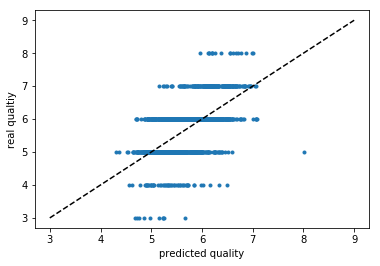

In [283]:
d = np.asarray(sol['x'][:12])
plt.plot(X.dot(d),Y,'.')
plt.plot([3,9],[3,9],'k--')
plt.xlabel('predicted quality')
plt.ylabel('real qualtiy')
plt.show()

In [287]:
print('The average L1 loss is:')
sol['primal objective']

0.4937487285454359